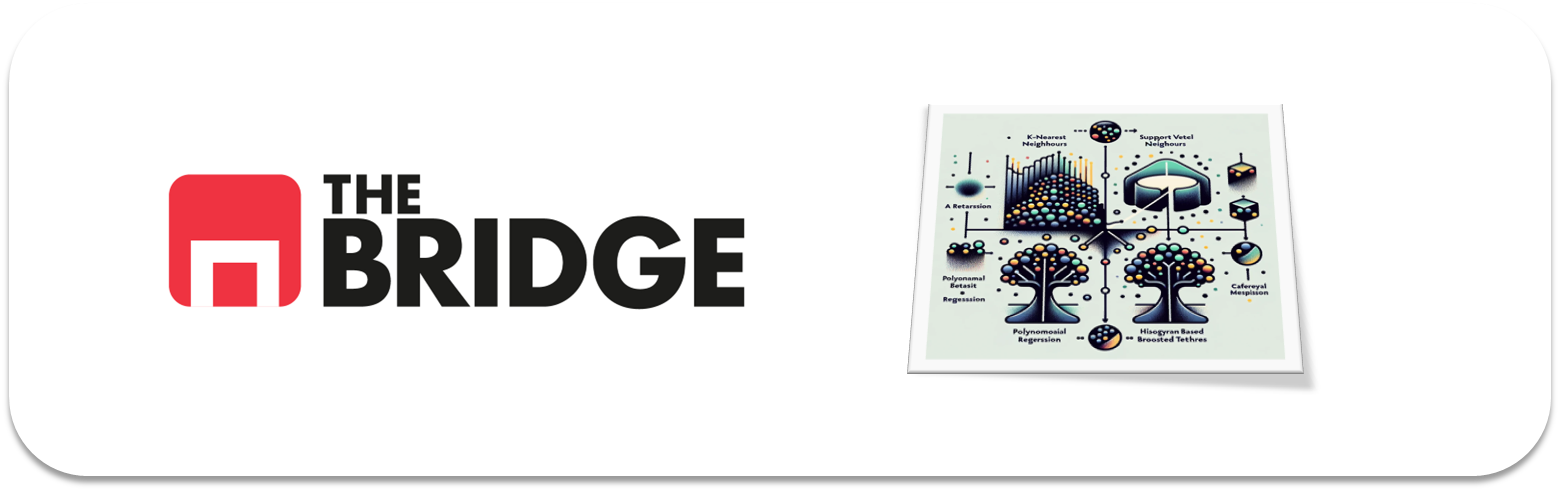

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, mean_squared_error, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import ToolBox as tb
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, make_scorer
from sklearn.pipeline import Pipeline

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [7]:
df_wine = pd.read_csv('./data/wines_dataset.csv', sep= '|')
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [9]:
tb.describe_df(df_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
DATA_TYPE,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,106,187,89,316,214,135,276,998,108,111,111,7,2
CARDIN (%),1.63,2.88,1.37,4.86,3.29,2.08,4.25,15.36,1.66,1.71,1.71,0.11,0.03


In [10]:
df_wine.quality.value_counts(True)

quality
6    0.436509
5    0.329075
7    0.166077
4    0.033246
8    0.029706
3    0.004618
9    0.000770
Name: proportion, dtype: float64

In [11]:
target_cat = df_wine.quality  #Se prioriza recall

In [12]:
df_wine.alcohol.value_counts(True)

alcohol
9.500000     0.056488
9.400000     0.051101
9.200000     0.041712
10.000000    0.035247
10.500000    0.034939
               ...   
11.550000    0.000154
12.333333    0.000154
10.566667    0.000154
10.750000    0.000154
11.433333    0.000154
Name: proportion, Length: 111, dtype: float64

In [13]:
target_num = df_wine.alcohol #Se prioriza precision

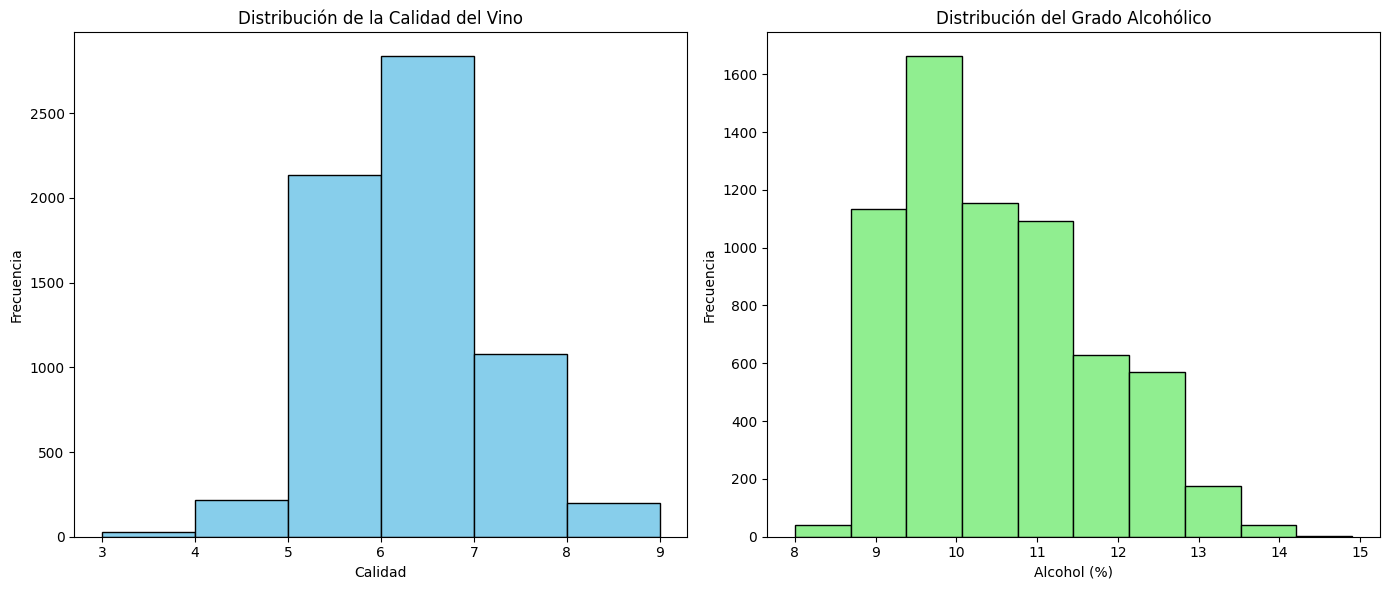

In [15]:
# Crear una figura con subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Distribución de la calidad del vino
axes[0].hist(df_wine['quality'], bins=6, color='skyblue', edgecolor='black')
axes[0].set_title('Distribución de la Calidad del Vino')
axes[0].set_xlabel('Calidad')
axes[0].set_ylabel('Frecuencia')

# Distribución del grado alcohólico
axes[1].hist(df_wine['alcohol'], bins=10, color='lightgreen', edgecolor='black')
axes[1].set_title('Distribución del Grado Alcohólico')
axes[1].set_xlabel('Alcohol (%)')
axes[1].set_ylabel('Frecuencia')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [27]:
X = df_wine.drop(['quality', 'class'], axis=1)
y = df_wine['quality']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el scorer para la validación cruzada
recall_scorer = make_scorer(recall_score, average='macro')

# Baseline: KNN con k=3 y k=5
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_5 = KNeighborsClassifier(n_neighbors=5)

# Otros modelos
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Lista de modelos
models = {
    'KNN (k=3)': knn_3,
    'KNN (k=5)': knn_5,
    'Random Forest': rf,
    'Gradient Boosting': gb
}

# Validación cruzada y evaluación
for model_name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=recall_scorer)
    print(f'{model_name} Recall Score: {scores.mean():.4f} ± {scores.std():.4f}')

c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
  File "c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_response.py", line 203, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of [3 4 5

KNN (k=3) Recall Score: nan ± nan
KNN (k=5) Recall Score: nan ± nan


c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
  File "c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_response.py", line 203, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of [3 4 5

Random Forest Recall Score: nan ± nan


c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
  File "c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_response.py", line 203, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of [3 4 5

Gradient Boosting Recall Score: nan ± nan


c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
  File "c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_response.py", line 203, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of [3 4 5

In [28]:
# Hiperparámetros para Random Forest (como ejemplo)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=recall_scorer, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo
best_rf = grid_search.best_estimator_

# Evaluación del mejor modelo en el conjunto de prueba
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
final_recall = recall_score(y_test, y_pred, average='macro')

print(f'Mejor Modelo: Random Forest Optimizado')
print(f'Recall en el conjunto de prueba: {final_recall:.4f}')


c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Mejor Modelo: Random Forest Optimizado
Recall en el conjunto de prueba: 0.4437


In [29]:
from sklearn.metrics import classification_report

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Análisis de errores
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.60      0.14      0.23        43
           5       0.72      0.72      0.72       432
           6       0.66      0.74      0.70       562
           7       0.62      0.58      0.60       210
           8       0.85      0.49      0.62        47

    accuracy                           0.67      1300
   macro avg       0.57      0.44      0.48      1300
weighted avg       0.67      0.67      0.67      1300

Predicted  3  4    5    6    7   8
Actual                            
3          0  0    5    1    0   0
4          1  6   24   11    1   0
5          0  4  309  116    2   1
6          0  0   90  417   55   0
7          0  0    2   84  121   3
8          0  0    0    7   17  23


# Repetimos pero balanceando los datos

In [34]:
from imblearn.over_sampling import SMOTE
# Separar las características y el target
X = df_wine.drop(['quality', 'class'], axis=1)
y = df_wine['quality']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42,k_neighbors= 4)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Estandarización de características
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

In [36]:
knn_model_smote = KNeighborsClassifier(n_neighbors=20)
knn_model_smote.fit(X_train_smote, y_train_smote)

y_pred_knn_smote = knn_model_smote.predict(X_test)
print(classification_report(y_test, y_pred_knn_smote))

              precision    recall  f1-score   support

           3       0.01      0.17      0.03         6
           4       0.12      0.56      0.20        43
           5       0.61      0.46      0.52       432
           6       0.61      0.23      0.34       562
           7       0.35      0.54      0.43       210
           8       0.19      0.64      0.29        47
           9       0.00      0.00      0.00         0

    accuracy                           0.38      1300
   macro avg       0.27      0.37      0.26      1300
weighted avg       0.53      0.38      0.40      1300



c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [38]:
c=cross_val_score(knn_model_smote, X_train_smote, y_train_smote, cv = 3, scoring = "recall_macro")
c

array([0.71786657, 0.7188089 , 0.72012816])

In [39]:
np.mean(c) 

0.7189345395150144

# Regresion logistica

In [42]:
log_reg = LogisticRegression(max_iter= 1000)

In [43]:
log_reg.fit(X_train_smote, y_train_smote)

y_pred_qua_log = log_reg.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred_qua_log))

              precision    recall  f1-score   support

           3       0.03      0.67      0.05         6
           4       0.08      0.33      0.13        43
           5       0.52      0.37      0.43       432
           6       0.58      0.25      0.35       562
           7       0.31      0.30      0.31       210
           8       0.10      0.43      0.16        47
           9       0.00      0.00      0.00         0

    accuracy                           0.31      1300
   macro avg       0.23      0.34      0.21      1300
weighted avg       0.48      0.31      0.36      1300



c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [45]:
cv_logaritmica = cross_val_score(log_reg, X_train_smote, y_train_smote, cv = 6, scoring = "recall_macro", n_jobs= -1)

print(f'El accuracy del logistic regresion -> {cv_logaritmica.max():.2f}.')

El accuracy del logistic regresion -> 0.53.


# Random forest

In [46]:
ran_forest = RandomForestClassifier(n_estimators= 100, max_depth= 10)

ran_forest.fit(X_train_smote, y_train_smote)

y_pred_forest = ran_forest.predict(X_test)

print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.14      0.35      0.20        43
           5       0.64      0.62      0.63       432
           6       0.64      0.44      0.52       562
           7       0.44      0.59      0.51       210
           8       0.28      0.51      0.36        47
           9       0.00      0.00      0.00         0

    accuracy                           0.52      1300
   macro avg       0.31      0.36      0.32      1300
weighted avg       0.57      0.52      0.53      1300



c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aritz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [47]:
cv_arbol = cross_val_score(ran_forest, X_train_smote, y_train_smote, cv = 6, scoring = "recall_macro", n_jobs= -1)

print(f'El accuracy del arbol -> {cv_arbol.max()}.')

El accuracy del arbol -> 0.8092725216735771.


In [48]:
grid_clf_forest = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [49]:
grid_model = GridSearchCV(
    ran_forest,
    grid_clf_forest,
    cv= 5,
    scoring= 'balanced_accuracy', 
    n_jobs= -1
)

grid_model.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='balanced_accuracy')

In [50]:
opt_forest = grid_model.best_estimator_

y_pred_forest_opt = opt_forest.predict(X_test)

print(classification_report(y_test, y_pred_forest_opt))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.30      0.35      0.32        43
           5       0.74      0.70      0.72       432
           6       0.68      0.60      0.64       562
           7       0.54      0.71      0.61       210
           8       0.45      0.53      0.49        47

    accuracy                           0.64      1300
   macro avg       0.45      0.48      0.46      1300
weighted avg       0.65      0.64      0.64      1300



In [51]:
cv_arbol_opt = cross_val_score(opt_forest, X_train_smote, y_train_smote, cv = 6, scoring = "recall_macro", n_jobs= -1)

print(f'El recall medio del arbol optimizado -> {cv_arbol_opt.max():.2f}.')

El recall medio del arbol optimizado -> 0.90.


### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

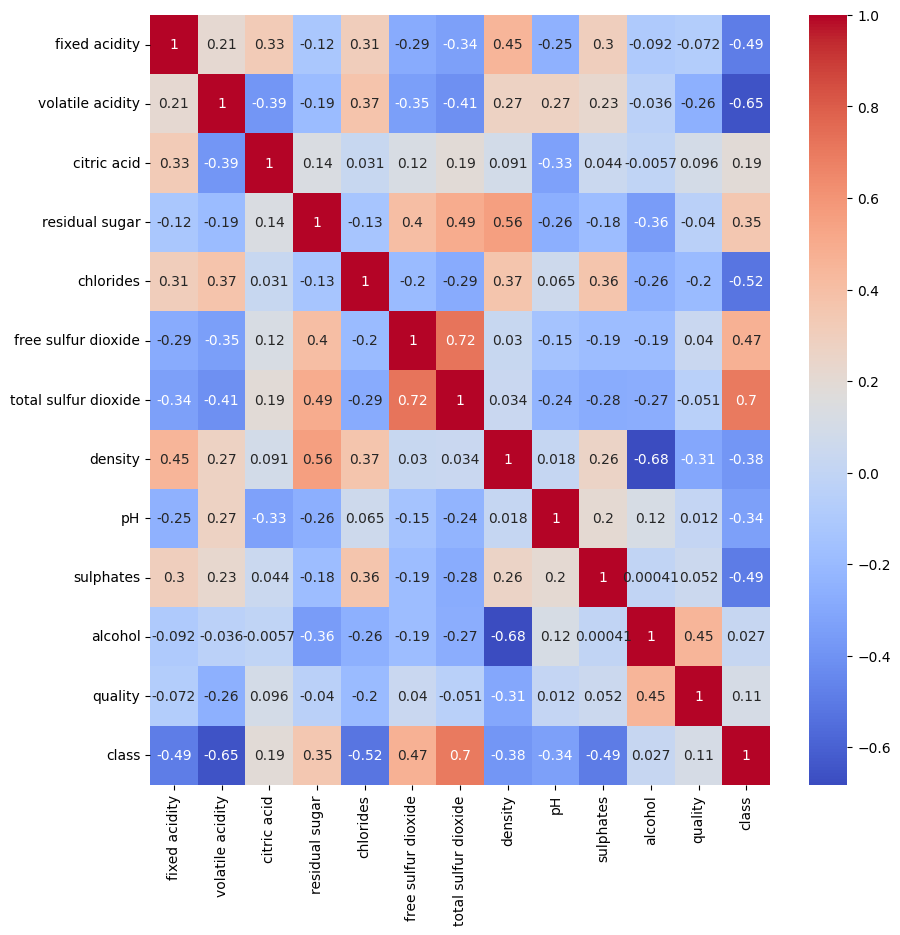

In [58]:
train_set, test_set = train_test_split(df_wine, test_size= 0.2, random_state= 42)

train_set['class'] = train_set['class'].apply(lambda x: 1 if x == 'white' else 0)
test_set['class'] = test_set['class'].apply(lambda x: 1 if x == 'white' else 0)

corr_matrix = train_set.corr()
plt.figure(figsize= (10, 10))
sns.heatmap(corr_matrix, cmap= 'coolwarm', annot= True);

Descartamos class, sulphates, pH,citric acid y fixed acidity.

In [72]:
# Separar las características y el target
X_train = train_set.drop(['quality', 'class'], axis=1)
y_train = train_set['quality']
X_test = test_set.drop(['quality', 'class'], axis=1)
y_test = test_set['quality']

In [73]:
tb.describe_df(df_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
DATA_TYPE,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,106,187,89,316,214,135,276,998,108,111,111,7,2
CARDIN (%),1.63,2.88,1.37,4.86,3.29,2.08,4.25,15.36,1.66,1.71,1.71,0.11,0.03


In [61]:
features=['volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density']

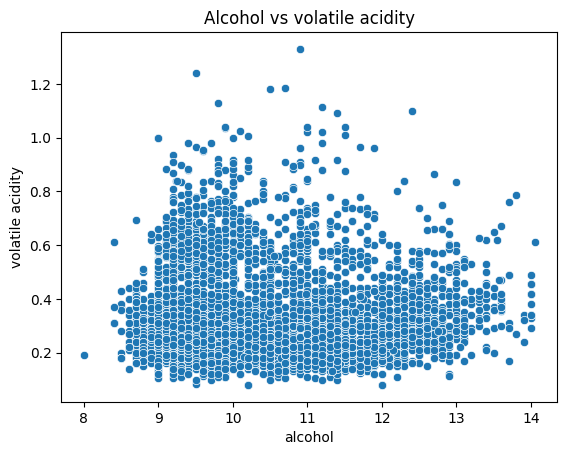

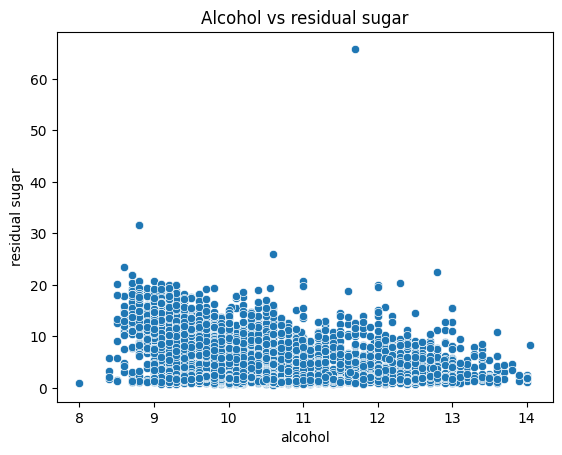

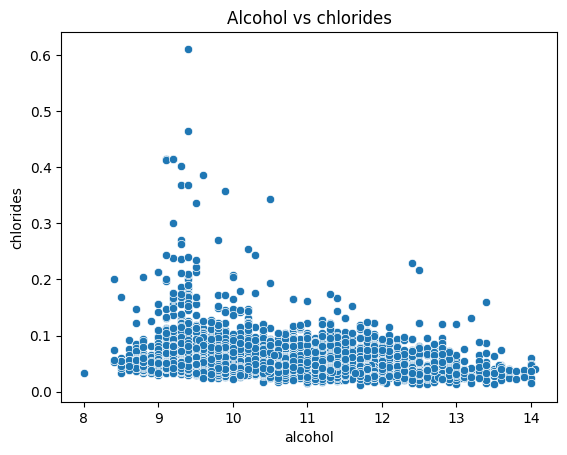

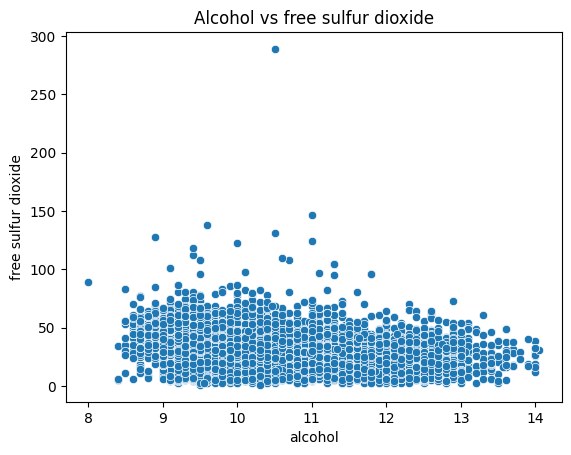

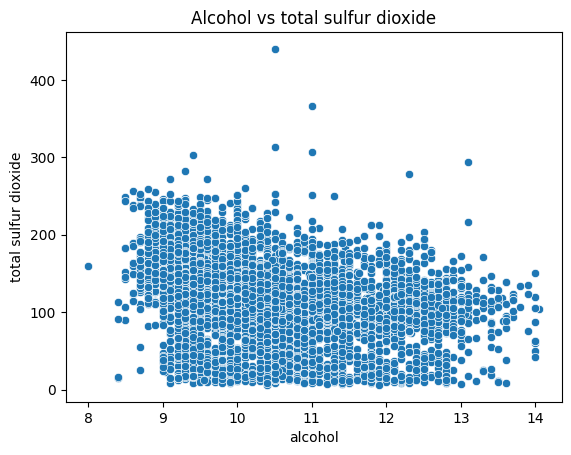

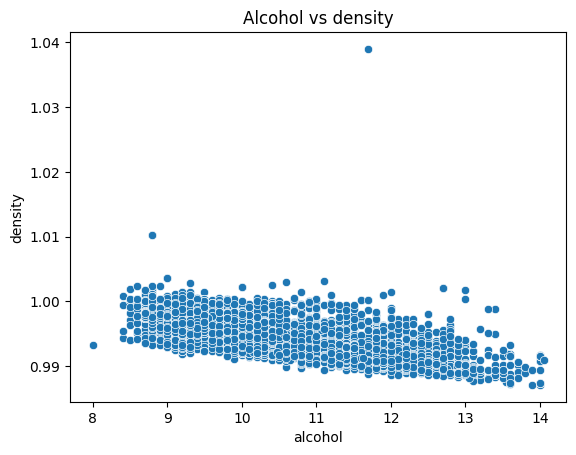

In [63]:
for col in features:
    sns.scatterplot(train_set, x= 'alcohol', y= col)
    plt.title(f'Alcohol vs {col}')
    plt.show()

In [78]:
X_train=X_train[features]
X_test=X_test[features]
X_train.describe()

,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density
count,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000
mean,0.339548,5.466615,0.055733,30.563306,115.592457,0.994714
std,0.162938,4.783581,0.032656,18.004967,56.805306,0.003012
min,0.080000,0.600000,0.012000,1.000000,6.000000,0.987110
25%,0.230000,1.800000,0.038000,17.000000,76.000000,0.992360
50%,0.290000,3.000000,0.047000,29.000000,118.000000,0.994900
75%,0.400000,8.100000,0.065000,41.000000,156.000000,0.997000
max,1.330000,65.800000,0.611000,289.000000,440.000000,1.038980


In [79]:
X_test.describe()

,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,0.340138,5.349769,0.057238,30.373462,116.352692,0.994627
std,0.171322,4.653964,0.043245,16.694440,55.391566,0.002943
min,0.090000,0.700000,0.009000,1.000000,7.000000,0.987400
25%,0.220000,1.800000,0.037000,17.000000,82.000000,0.992290
50%,0.290000,2.875000,0.047000,29.000000,118.000000,0.994800
75%,0.400000,8.000000,0.063250,41.000000,156.000000,0.996893
max,1.580000,26.050000,0.610000,98.000000,344.000000,1.003200


In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Regresion lineal

In [81]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred_lin =lin_reg.predict(X_test)

In [84]:
print(f'MSE prediccion de regresion lineal -> {mean_squared_error(y_test, y_pred_lin)}.')
print(f'RMSE prediccion de regresion lineal -> {np.sqrt(mean_squared_error(y_test, y_pred_lin))}.')

MSE prediccion de regresion lineal -> 0.629266962655974.
RMSE prediccion de regresion lineal -> 0.7932634887954784.


# Gradient boosting regressor

In [87]:
grad_boost = GradientBoostingRegressor(max_depth= 10, random_state= 42)

grad_boost.fit(X_train, y_train)

y_pred_grad = grad_boost.predict(X_test)

In [88]:
print(f'MSE prediccion de gradient booting -> {mean_squared_error(y_test, y_pred_grad)}.')
print(f'RMSE prediccion de gradient boosting -> {np.sqrt(mean_squared_error(y_test, y_pred_grad))}.')

MSE prediccion de gradient booting -> 0.4168310454887207.
RMSE prediccion de gradient boosting -> 0.6456245391004904.


# XGboost

In [89]:
xg_boost = xgb.XGBRegressor(max_depth= 10, random_state= 42)

xg_boost.fit(X_train, y_train)

y_pred_xg = xg_boost.predict(X_test)

In [90]:
print(f'MSE prediccion de xggboost -> {mean_squared_error(y_test, y_pred_xg)}.')
print(f'RMSE prediccion de xgboost -> {np.sqrt(mean_squared_error(y_test, y_pred_xg))}.')

MSE prediccion de xggboost -> 0.4147738440891044.
RMSE prediccion de xgboost -> 0.6440293813865205.


# Hiperparámetros para el regresor lineal

In [91]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge()
lasso = Lasso()

param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

param_grid_lasso = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)

# Mejor modelo Ridge
best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mejor Modelo Ridge: {best_ridge}')
print(f'Ridge MSE en el conjunto de prueba: {mse_ridge:.4f}')

# Realizar la búsqueda de hiperparámetros para Lasso Regression
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_lasso.fit(X_train, y_train)

# Mejor modelo Lasso
best_lasso = grid_search_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mejor Modelo Lasso: {best_lasso}')
print(f'Lasso MSE en el conjunto de prueba: {mse_lasso:.4f}')

Mejor Modelo Ridge: Ridge(alpha=10)
Ridge MSE en el conjunto de prueba: 0.6293
Mejor Modelo Lasso: Lasso(alpha=0.01)
Lasso MSE en el conjunto de prueba: 0.6318
